In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 3. The AR Model

In [2]:
# Import the dataframe

url1 = ('https://raw.githubusercontent.com/Apress/advanced-forecasting-python/refs/heads/main/Ch03_Earthquake_database.csv')

eq = pd.read_csv(url1)

eq.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
# Describe the dataframe
eq.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


#### Convert the earthquake data to the yearly number of earthquake

In [4]:
eq.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
# Proper: keep index as datetime, no .strftime
eq['Date'] = pd.to_datetime(eq['Date'], errors='coerce')
eq.dropna(subset=['Date'], inplace=True)
eq.set_index('Date', inplace=True)

eq.head()

,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,,,,,,,,,
1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


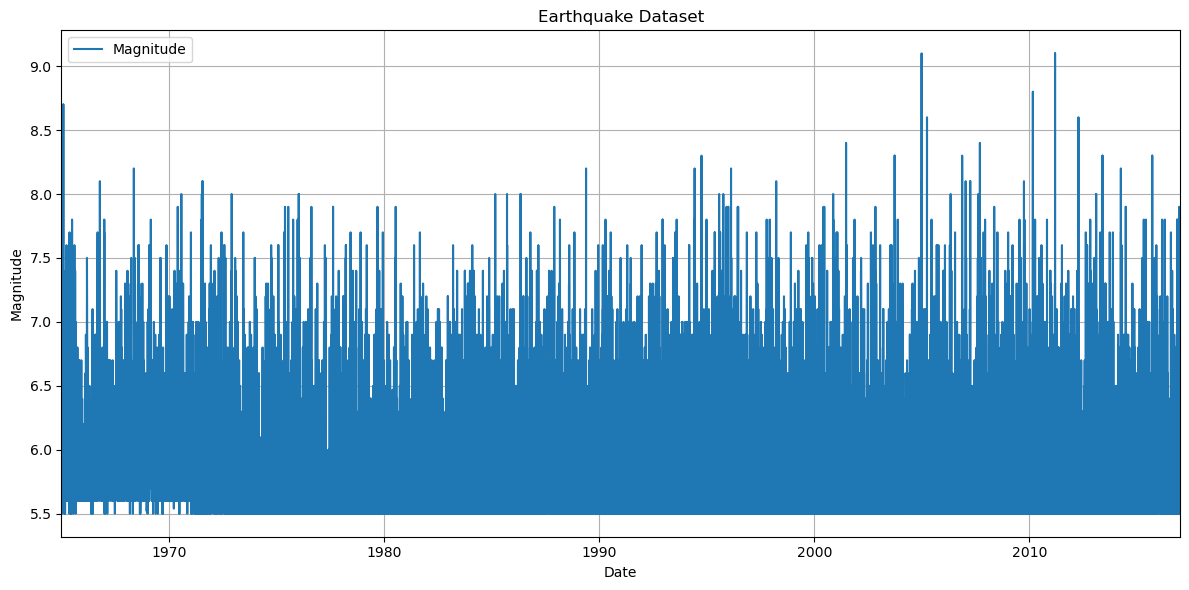

In [6]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(eq.index, eq['Magnitude'], label='Magnitude')     

plt.title('Earthquake Dataset')                      
plt.xlabel('Date')                                        
plt.ylabel('Magnitude')  
plt.xlim(pd.to_datetime('1965-01-02'), pd.to_datetime('2016-12-30'))
plt.grid(True)                                            
plt.legend(loc=2)                                             
plt.tight_layout()                                       
plt.show();

In [13]:
eqh = eq[eq['Magnitude']>=7]

eqh.head()

,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,,,,,,,,,
1965-01-24,00:11:17,-2.608,125.952,Earthquake,20.0,NaN,NaN,8.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM861299,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-02-04,05:01:22,51.251,178.715,Earthquake,30.3,NaN,NaN,8.7,MW,NaN,NaN,NaN,NaN,NaN,NaN,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic
1965-02-04,08:40:44,51.443,179.605,Earthquake,30.0,NaN,NaN,7.3,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM859264,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-02-23,22:11:47,-25.633,-70.679,Earthquake,35.0,NaN,NaN,7.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860516,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-03-14,15:53:07,36.405,70.724,Earthquake,207.8,NaN,NaN,7.4,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM858598,ISCGEM,ISCGEM,ISCGEM,Automatic


In [14]:
# Ensure index is datetime type
eqh.index = pd.to_datetime(eqh.index)

# Extract year and count earthquakes per year
eqh = eqh.copy()
eqh['Year'] = eqh.index.year
earthquakes_per_year = eqh.groupby('Year').size()

# Show the result
earthquakes_per_year.head()

Year
1965    18
1966     9
1967    11
1968    22
1969    14
dtype: int64

In [16]:
shifts = pd.DataFrame(
    {
        'this year': earthquakes_per_year,
        'past year': earthquakes_per_year.shift(1)
    }
)

shifts.head()

,this year,past year
Year,,
1965,18,NaN
1966,9,18.0
1967,11,9.0
1968,22,11.0
1969,14,22.0


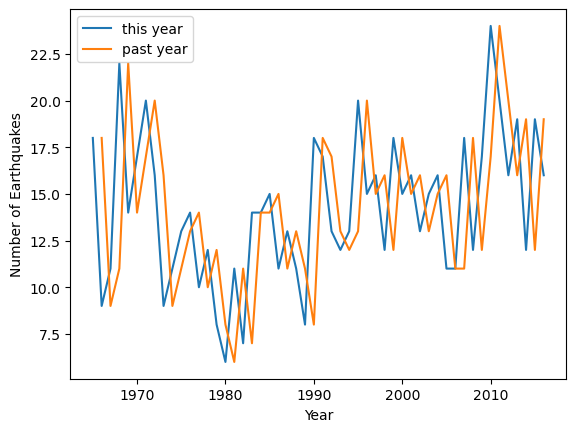

In [17]:
ax = shifts.plot()
ax.set_ylabel('Number of Earthquakes')
plt.show()

In [19]:
shifts = shifts.dropna()

shifts.corr()

,this year,past year
this year,1.000000,0.266657
past year,0.266657,1.000000


In [22]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(earthquakes_per_year.dropna())

print(result)

pvalue = result[1]
if pvalue < 0.05:
    print('Stationary')
else:
    print('Not stationary')

(-5.380533478877688, 3.7211181090570817e-06, 0, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 219.69402897705194)

Stationary


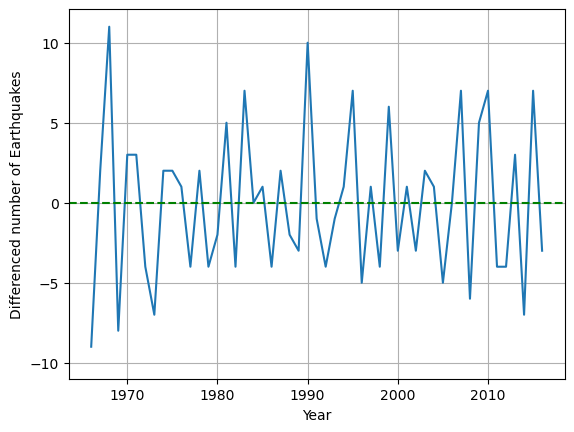

In [27]:
# Difference the data
differenced_data = earthquakes_per_year.diff().dropna()

# Plot the differenced data
ax = differenced_data.plot()
ax.set_ylabel('Differenced number of Earthquakes')

ax.axhline(y=0, color='green', linestyle='--') 
max_resid = max(abs(differenced_data))
ax.set_ylim(-max_resid, max_resid*1.1)

ax.grid()
plt.show()

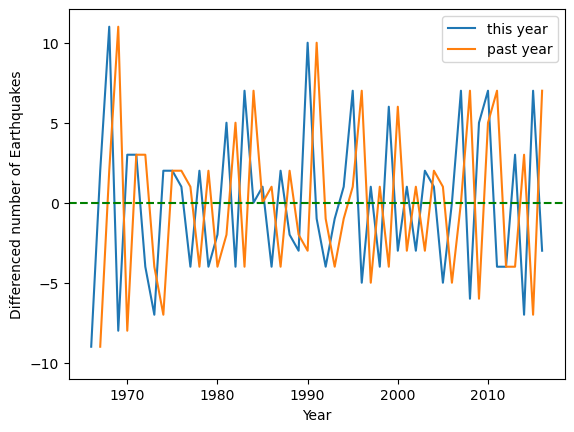

,this year,past year
this year,1.00000,-0.41607
past year,-0.41607,1.00000


In [29]:
shifts_diff = pd.DataFrame(
    {
        'this year': differenced_data,
        'past year': differenced_data.shift(1)
    }
)

ax = shifts_diff.plot()
ax.set_ylabel('Differenced number of Earthquakes')
ax.axhline(y=0, color='green', linestyle='--') 
max_resid = max(abs(differenced_data))
ax.set_ylim(-max_resid, max_resid*1.1)
plt.show()

shifts_diff.corr()

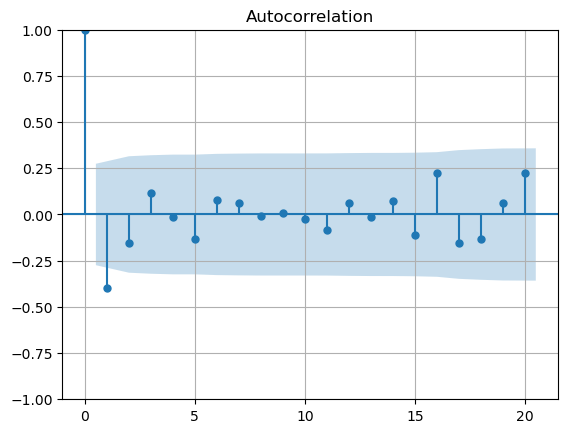

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(differenced_data, lags=20)
plt.grid()
plt.show();

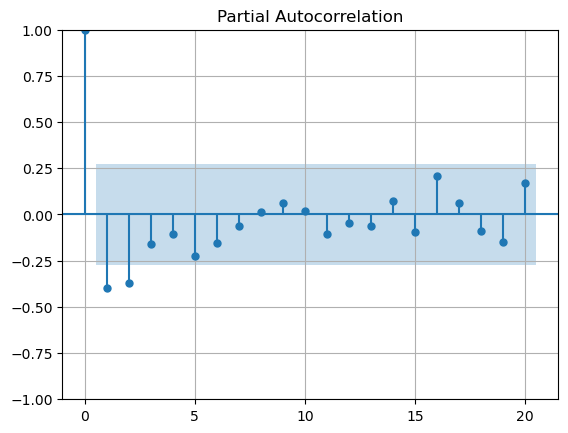

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(differenced_data, lags = 20)
plt.grid()
plt.show();

In [35]:
import pmdarima as pm

# Perform a full grid search over ARIMA(p,d,q) models (non-seasonal)
auto_model = pm.auto_arima(
    differenced_data,           # The time series data
    seasonal=False,             # Disable seasonal component
    d=0,                        # Differencing order
    start_p=0, max_p=3,         # p from 0 to 3
    start_q=0, max_q=3,         # q from 0 to 3
    stepwise=True,              # Use stepwise search for efficiency
    trace=True,                 # Show search progress
    error_action='ignore',      # Ignore errors and continue
    suppress_warnings=True,     # Suppress convergence warnings
    information_criterion='aic' # Use AIC to choose the best model
)

# Print the best ARIMA model
print(f"Best model: ARIMA{auto_model.order}")

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=304.647, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=297.166, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=285.426, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=287.135, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=287.082, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=288.750, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=287.239, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.111 seconds
Best model: ARIMA(0, 0, 1)


In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
import warnings
warnings.filterwarnings("ignore")


def combinator(items, r=1):
    combo = [i for i in product(*items, repeat=r)]  # Generate all combinations
    return combo

# Define non-seasonal parameter ranges for (p, d, q)
P_ns, Q_ns = [list(range(4))]*2  # p and q range from 0 to 3
d = 0                            # Differencing

total = (P_ns[-1] + 1) * (Q_ns[-1] + 1)
print(f'Total number of ARIMA models: {total}')

# Generate combinations of ARIMA(p, d, q)
vals = combinator([P_ns, [d], Q_ns])

score = {}  # Dictionary to store results

for i, (p, d, q) in enumerate(vals):
    if i % 10 == 0:
        print(f'Running model #{i} using ARIMA({p},{d},{q})')

    m = SARIMAX(differenced_data,
                order=(p, d, q),
                enforce_stationarity=False)

    res = m.fit(disp=0, low_memory=True)

    score[i] = {
        'ARIMA order': (p, d, q),
        'AIC': res.aic,
        'AICc': res.aicc,
        'model': res
    }

# Display the top 5 models by AIC
pd.DataFrame(score).T.sort_values(by='AIC').reset_index(drop=True).head()

Total number of ARIMA models: 16
Running model #0 using ARIMA(0,0,0)
Running model #10 using ARIMA(2,0,2)


,ARIMA order,AIC,AICc,model
0,"(0, 0, 3)",260.551491,261.503872,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
1,"(1, 0, 3)",262.39241,263.855824,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
2,"(2, 0, 3)",263.911785,266.011785,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
3,"(3, 0, 3)",265.36465,268.236445,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
4,"(1, 0, 2)",266.307833,267.238066,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...


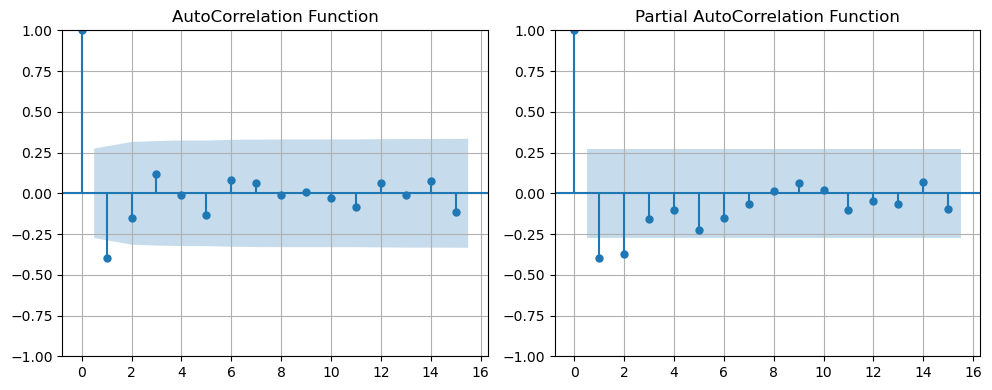

In [46]:
# Create a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  

# Interest Rate Data
plot_acf(differenced_data, ax=axes[0], lags=15)
axes[0].set_title("AutoCorrelation Function", fontsize=12)
axes[0].grid(True)

# Simulated Random Walk Data
plot_pacf(differenced_data, ax=axes[1], lags=15)
axes[1].set_title("Partial AutoCorrelation Function", fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show();

### Estimate Yule Walker AR coefficients with order 3

In [41]:
from statsmodels.regression.linear_model import yule_walker

# Yule-Walker Equation
coefficients, sigma = yule_walker(differenced_data, order = 3) # p = 3

print('coefficients: ', -coefficients)
print('sigma: ', sigma)

coefficients:  [0.63390427 0.48970585 0.17569908]
sigma:  3.8940613973301224


The estimated AR coefficients from the Yule-Walker equations are:

$$
\phi_1 = 0.63, \quad \phi_2 = 0.49, \quad \phi_3 = 0.18
$$

The estimated white noise variance is:

$$
\sigma^2 = 3.89
$$

---

$$
Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} + \varepsilon_t
$$

$$
\sigma^2 = \operatorname{Var}(\varepsilon_t)
$$

### Make a Forecast with the AR coefficients

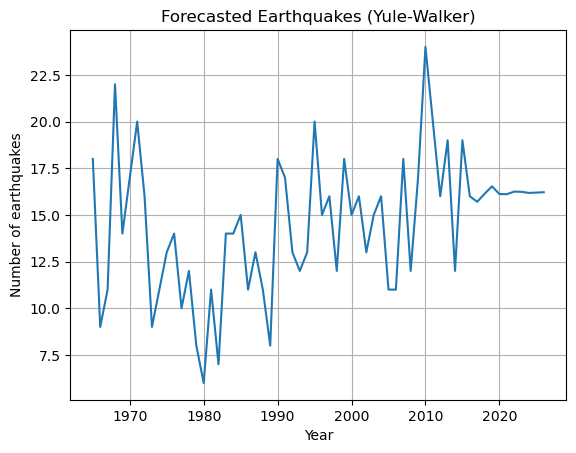

In [45]:
coefficients, sigma = yule_walker(differenced_data, order = 3)

# Make a list of differenced values
val_list = list(differenced_data)

# Reverse the list so that the order corresponds with the order of the coefficients
val_list.reverse()
# Define the number of years to predict
n_steps = 10

# For each year to predict
for i in range(n_steps):
    
    # Compute the new value as the sum of lagged values multiplied by their corresponding coefficient
    new_val = 0
    for j in range(len(coefficients)):
        
        new_val += coefficients[j] * val_list[j]
    
    # Insert the new value at the beginning of the list
    val_list.insert(0, new_val)

# Redo the reverse to have the order of time
val_list.reverse()

# Add the original first value back into the list and do a cumulative sum to undo the differencing 
val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

# Create matching x-axis years
years = range(earthquakes_per_year.index[0], earthquakes_per_year.index[0] + len(new_val_list))

# Plot the newly obtained list
plt.plot(years, new_val_list)
plt.ylabel('Number of earthquakes')
plt.xlabel('Year')
plt.title('Forecasted Earthquakes (Yule-Walker)')
plt.grid(True)
plt.show()

Test R2: -1.9577077046516704


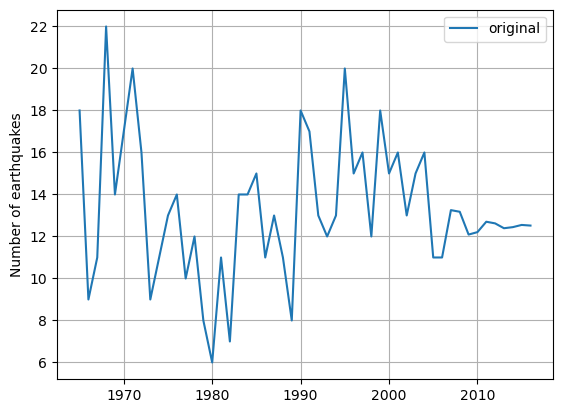

In [50]:
from sklearn.metrics import r2_score

train = list(differenced_data)[:-10]
test = list(earthquakes_per_year)[-10:]

coefficients, sigma = yule_walker(train, order = 3)

# Make a list of differenced values
val_list = list(train)
# Reverse the list so that the order corresponds with the order of the coefficients
val_list.reverse()
# Define the number of years to predict
n_steps = 10

# For each year to predict
for i in range(n_steps):
    
    # Compute the new value as the sum of lagged values multiplied by their corresponding coefficient
    new_val = 0
    for j in range(len(coefficients)):
        
        new_val += coefficients[j] * val_list[j]
    
    # Insert the new value at the beginning of the list
    val_list.insert(0, new_val)

# Redo the reverso to have the order of time
val_list.reverse()

# Add the original first value back into the list and do a cumulative sum to undo the differencing 
val_list = [earthquakes_per_year.iloc[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

# Plot the newly obtained list
validation = pd.DataFrame({
    'original': earthquakes_per_year.reset_index(drop=True),
    'pred': new_val_list })

print('Test R2:', r2_score(validation.iloc[-10:, 0], validation.iloc[-10:, 1]))

# Create matching x-axis years
years = range(earthquakes_per_year.index[0], earthquakes_per_year.index[0] + len(new_val_list))

# Plot the newly obtained list
plt.plot(years, new_val_list)
plt.legend(validation.columns)
plt.ylabel('Number of earthquakes')
plt.grid()
plt.show()

### Fit the model on a train set and evaluate it on a test set

Test R²: -1.9577077046516704


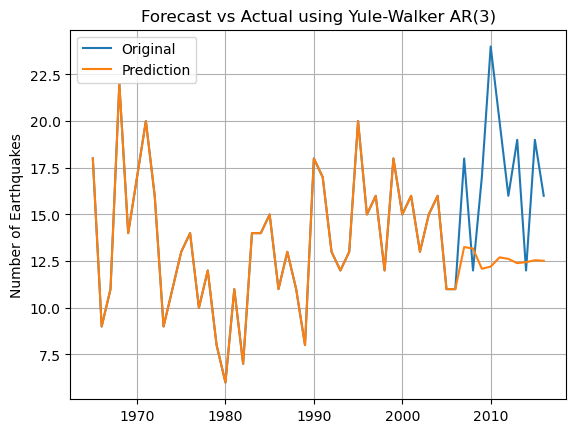

In [51]:
from statsmodels.regression.linear_model import yule_walker
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Split data into training and testing
train = list(differenced_data)[:-10]                 # Use all but the last 10 as training
test = list(earthquakes_per_year)[-10:]              # Last 10 values as test set

# Step 2: Apply Yule-Walker estimation on training data
coefficients, sigma = yule_walker(train, order=3)    # AR(3) model

# Step 3: Prepare the list for forecasting
val_list = list(train)                               # Start with training data
val_list.reverse()                                   # Reverse for lag order

# Step 4: Forecast next 10 steps
n_steps = 10
for i in range(n_steps):
    new_val = sum(coefficients[j] * val_list[j] for j in range(len(coefficients)))
    val_list.insert(0, new_val)                      # Insert forecasted value at the beginning

val_list.reverse()                                   # Restore original time order

# Step 5: Undo differencing with cumulative sum
val_list = [earthquakes_per_year.iloc[0]] + val_list  # Use first actual value to reconstruct
new_val_list = pd.Series(val_list).cumsum()            # Reconstruct original scale

# Step 6: Evaluation and plotting
validation = pd.DataFrame({
    'original': earthquakes_per_year.reset_index(drop=True),
    'pred': new_val_list
})

print('Test R²:', r2_score(validation.iloc[-10:, 0], validation.iloc[-10:, 1]))

# Step 7: Plot
years = range(earthquakes_per_year.index[0], earthquakes_per_year.index[0] + len(new_val_list))
plt.plot(years, validation['original'], label='Original')
plt.plot(years, validation['pred'], label='Prediction')
plt.legend()
plt.ylabel('Number of Earthquakes')
plt.title('Forecast vs Actual using Yule-Walker AR(3)')
plt.grid(True)
plt.show()

####  Apply a grid search to find the order that gives the best R2 score on the test data

In [53]:
def evaluate(order):
    train = list(differenced_data)[:-10]
    test = list(earthquakes_per_year)[-10:]

    coefficients, sigma = yule_walker(train, order = order)

    # Make a list of differenced values
    val_list = list(train)
    # Reverse the list to corresponds with the order of coefs
    val_list.reverse()
    # Define the number of years to predict
    n_steps = 10

    # For each year to predict
    for i in range(n_steps):

        # Compute the new value 
        new_val = 0
        for j in range(len(coefficients)):
            new_val += coefficients[j] * val_list[j]

        # Insert the new value at the beginning of the list
        val_list.insert(0, new_val)

    # Redo the reverse to have the order of time
    val_list.reverse()

    # Undo the differencing with a cumsum
    val_list = [earthquakes_per_year.iloc[0]] + val_list
    new_val_list = pd.Series(val_list).cumsum()

    # Plot the newly obtained list
    validation = pd.DataFrame({
        'original': earthquakes_per_year.reset_index(drop=True),
        'pred': new_val_list })

    return r2_score(validation.iloc[-10:, 0], validation.iloc[-10:, 1])

# For each order between 1 and 30, fit and evaluate the model
orders = []
r2scores = []
for order in range(1, 31):
    orders.append(order)
    r2scores.append(evaluate(order))
    
# Create a results data frame
results =pd.DataFrame({'orders': orders,
                      'scores': r2scores})

# Show the order with best R2 score
results[results['scores'] == results.max()['scores']]

,orders,scores
5,6,-1.262231


Means that the best AR model order = 6 (i.e., ARIMA(6,1,0)) gave an R² score of -1.26 when forecasting the last 10 values.

R² < 0 → model performs worse than simply using the mean of the training data.

# 4. The MA Model

In [58]:
import yfinance as yf 


# Define the ticker symbol and the date range
ticker = 'MSFT'                 
start_date = '2019-01-01'       
end_date = '2019-12-31'          

# Download historical stock data
msft_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows
msft_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2019-01-02,95.119797,95.712412,93.069152,93.642957,35329300
2019-01-03,91.620544,94.244994,91.432408,94.160331,42579100
2019-01-04,95.881752,96.427338,93.059764,93.802888,44060600
2019-01-07,96.004036,97.142237,94.988126,95.608959,35656100
2019-01-08,96.700119,97.800693,95.674793,96.925876,31514400


In [59]:
data = msft_data['Close']
data.head()

Ticker,MSFT
Date,
2019-01-02,95.119797
2019-01-03,91.620544
2019-01-04,95.881752
2019-01-07,96.004036
2019-01-08,96.700119


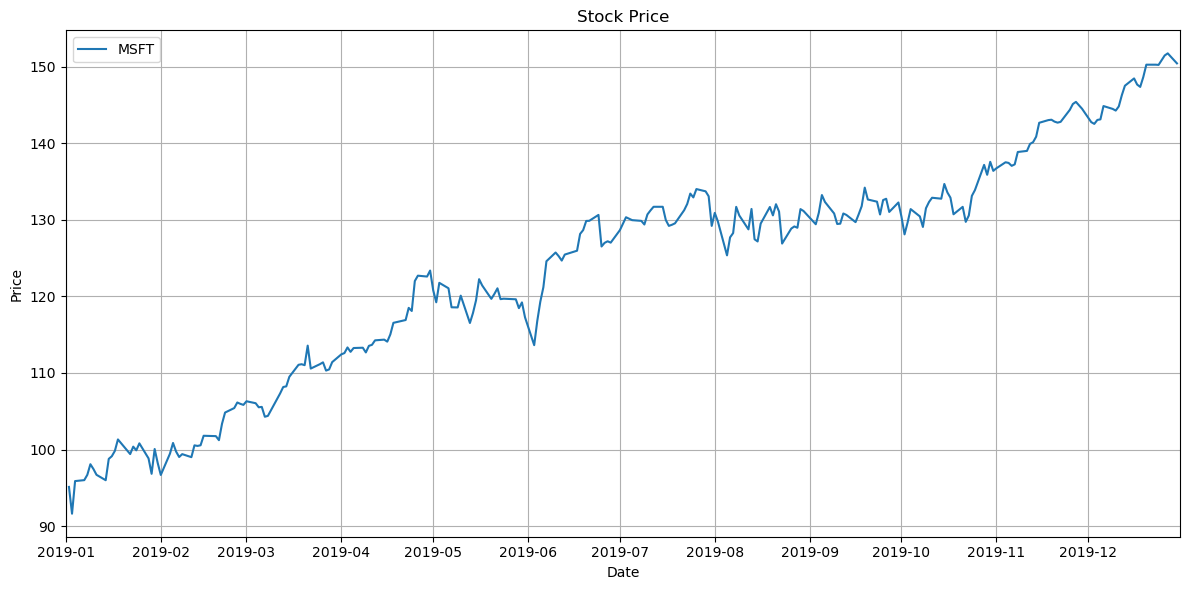

In [62]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(data.index, data['MSFT'], label='MSFT')     

plt.title('Stock Price')                      
plt.xlabel('Date')                                        
plt.ylabel('Price')  
plt.xlim(pd.to_datetime('2019-01-01'), pd.to_datetime('2019-12-31'))
plt.grid(True)                                            
plt.legend(loc=2)                                             
plt.tight_layout()                                       
plt.show();

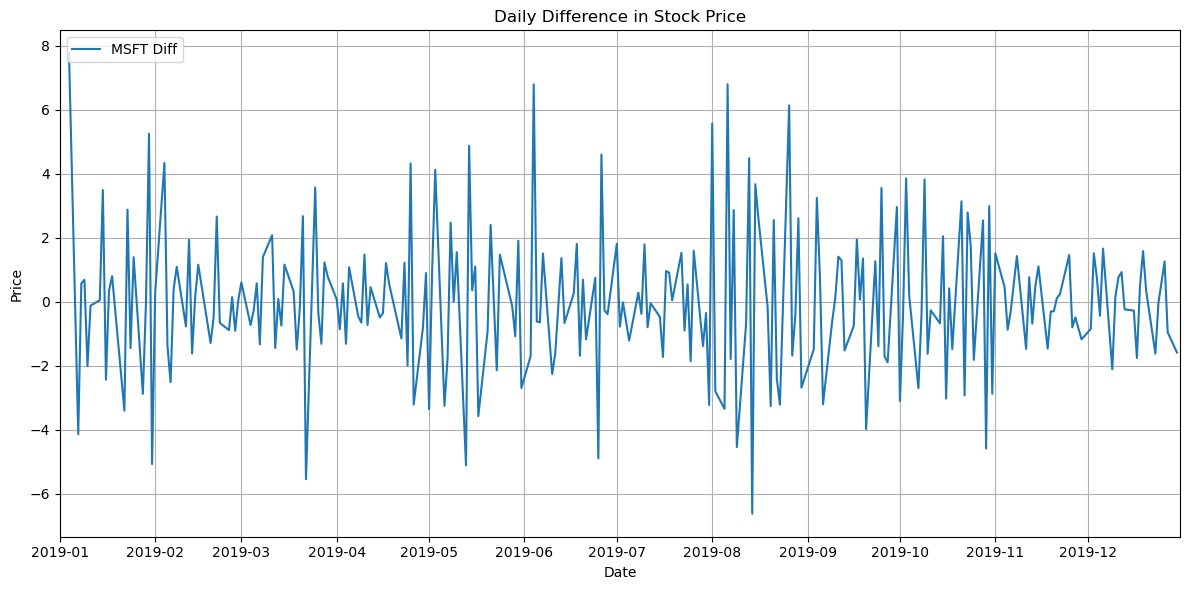

In [66]:
# Need to difference
datad = data.diff().dropna()


# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(datad.index, datad['MSFT'], label='MSFT Diff')     

plt.title('Daily Difference in Stock Price')                      
plt.xlabel('Date')                                        
plt.ylabel('Price')  
plt.xlim(pd.to_datetime('2019-01-01'), pd.to_datetime('2019-12-31'))
plt.grid(True)                                            
plt.legend(loc=2)                                             
plt.tight_layout()                                       
plt.show();

In [67]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(datad)
pvalue = result[1]

if pvalue < 0.05:
    print('Stationary')
else:
    print('Not stationary')

Stationary


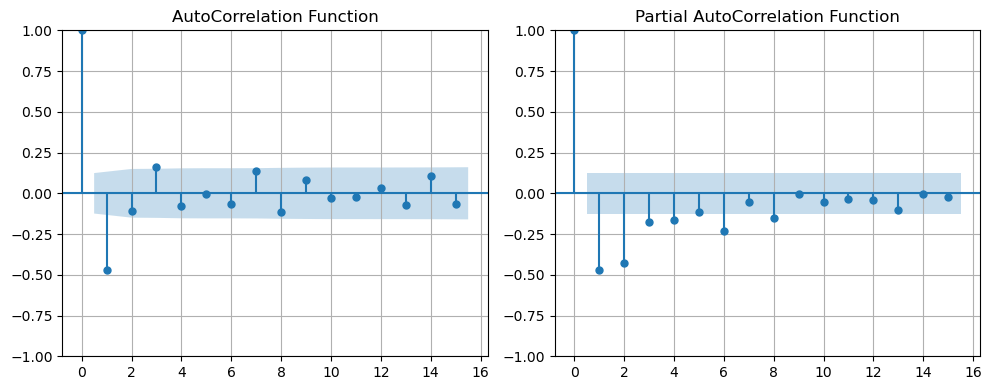

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  

# Interest Rate Data
plot_acf(datad, ax=axes[0], lags=15)
axes[0].set_title("AutoCorrelation Function", fontsize=12)
axes[0].grid(True)

# Simulated Random Walk Data
plot_pacf(datad, ax=axes[1], lags=15)
axes[1].set_title("Partial AutoCorrelation Function", fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show();

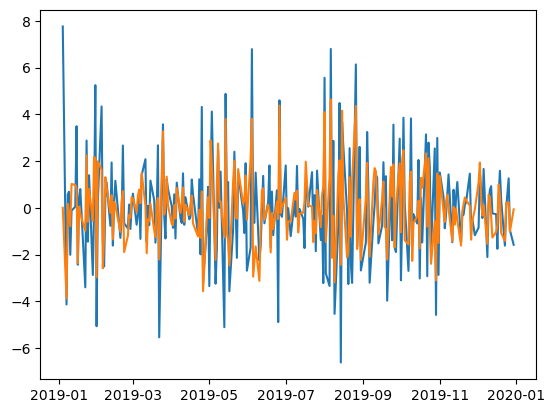

0.5121197200657986


In [70]:
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

# Forecast the first MA(1) model
mod = ARIMA(data.diff().dropna(), order=(0,0,1))
res = mod.fit()

orig_data = data.diff().dropna()
pred = res.predict()

plt.plot(orig_data)
plt.plot(pred)
plt.show()

print(r2_score(orig_data, pred))